In [1]:
#laod CSV File as pd and name titanic_data
#load needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


titanic_data=pd.read_csv("titanic-data.csv")



In [2]:
#Questions I'd like to explore:
#1.  Were the survivors more likely to be women or children?
#2.  What was the average ticket price of the survivors and did cost of the ticket matter in survivability?

In [69]:
#use this to see data when needed
#max rows = 1000 so i can see all data
#May not be needed but I wanted to see what the data looks like
pd.options.display.max_rows = 1000
print titanic_data.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked age_categories  
0      0         A/5 21171   7.2500   NaN        S          adult  
1      0          PC 17599  71.2833   C85        C          adult  
2      0  STON/O2. 3101282   7.9250   NaN        S          adult  
3      0            113803  53.1000  C123       

In [3]:
#magic.....really. I learned this command will activate pylab (matplotlib, numpy and interactive support)
#still trying to understand the importance of this but i think i need to populate interactive namespace.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#look at subset of data.  For question 1 i care more about the Survived, Sex and Age fields
titanic_subset=titanic_data.groupby(['PassengerId', 'Survived', 'Sex', 'Age'])
print titanic_subset['Survived'].first().head(n=15)



PassengerId  Survived  Sex     Age 
1            0         male    22.0    0
2            1         female  38.0    1
3            1         female  26.0    1
4            1         female  35.0    1
5            0         male    35.0    0
7            0         male    54.0    0
8            0         male    2.0     0
9            1         female  27.0    1
10           1         female  14.0    1
11           1         female  4.0     1
12           1         female  58.0    1
13           0         male    20.0    0
14           0         male    39.0    0
15           0         female  14.0    0
16           1         female  55.0    1
Name: Survived, dtype: int64


In [5]:
#The 4 fields i care about are PassengerID, Survived, Sex and Age for question #1
#From this we can see 38.38% of the passengers survived

four_fields=titanic_data[['PassengerId', 'Survived', 'Sex', 'Age']].describe()
four_fields




,PassengerId,Survived,Age
count,891.000000,891.000000,714.000000
mean,446.000000,0.383838,29.699118
std,257.353842,0.486592,14.526497
min,1.000000,0.000000,0.420000
25%,223.500000,0.000000,20.125000
50%,446.000000,0.000000,28.000000
75%,668.500000,1.000000,38.000000
max,891.000000,1.000000,80.000000


In [6]:
#sx_at_launch is not what you expected.....it is the number of each sex at time of launch
sex_at_launch=titanic_data.groupby(['Sex'])['Pclass'].count()
sex_at_launch

Sex
female    314
male      577
Name: Pclass, dtype: int64

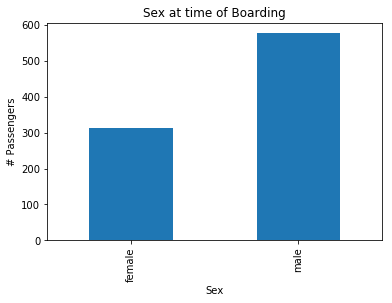

In [63]:
#Graphically, the division by sex_at_launch looks like this
#titanic_data.groupby(['Sex'])[['PassengerId']].count().plot(kind='bar').set_ylabel('# Passengers')
sex_at_launch.plot(kind='bar', title ="Sex at time of Boarding").set_ylabel('# Passengers')

In [8]:
#by number of each survivors, that looks like this
survivors=titanic_data.groupby(['Sex'])['Survived'].sum()
survivors

Sex
female    233
male      109
Name: Survived, dtype: int64

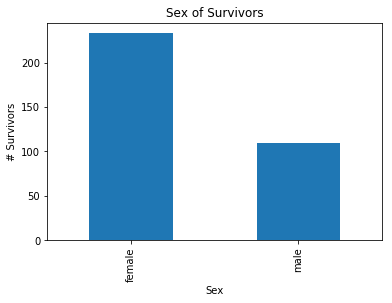

In [62]:
#graphically it looks like this.....
#Even though we started with 577 males, there were over twice as many surviving females.


#titanic_data.groupby(['Sex' ])[['Survived']].count().stack().plot(kind='bar').set_ylabel('Count')
#df_sex_survived = titanic_data[(titanic_data.Survived)==1]
#df_sex_survived.groupby(['Sex'])[['Survived']].sum().plot(kind='bar').set_ylabel('# Survived by Sex')
#plt.show()

survivors.plot(kind='bar', title ="Sex of Survivors").set_ylabel('# Survivors')

In [10]:
#I can tell that only 12.22% of the survivesrs were males surved and 26.15% of the survivors were females
# even though at launch 64.76% were males and 35.24% were females
ratio=titanic_data.groupby(['Sex'])['Survived'].sum()/891
ratio

Sex
female    0.261504
male      0.122334
Name: Survived, dtype: float64

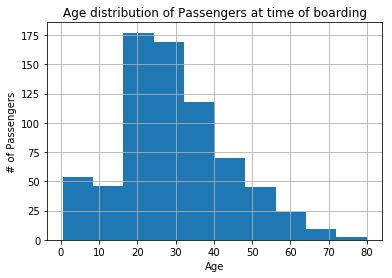

In [11]:
#here's a histogram of the age of the passengers at time of boarding
ax = titanic_data['Age'].hist()
ax.set_ylabel('# of Passengers')
ax.set_xlabel('Age')
ax.set_title('Age distribution of Passengers at time of boarding')


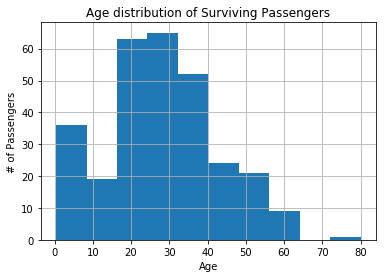

In [13]:
#here's a histogram of the age of the surviving passengers
#There was a bias to protect the individuals below 20 years old

df_sex_survived = titanic_data[(titanic_data.Survived)==1]
ax = df_sex_survived['Age'].hist()
ax.set_ylabel('# of Passengers')
ax.set_xlabel('Age')
ax.set_title('Age distribution of Surviving Passengers')


In [59]:

#separate the categories by age so I can see graphically their ages

titanic_data['age_categories'] = pd.cut(titanic_data['Age'], bins = [0,18,40,81],labels=['child','adult','senior'])

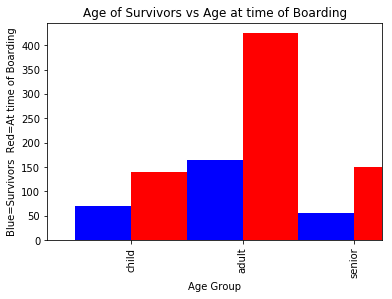

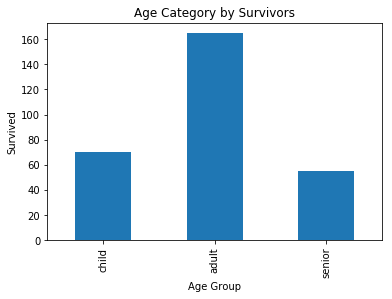

In [67]:
#from the graph below it appears there was a concerted effort to save youth over the aged

ax = titanic_data.groupby('age_categories')['Survived'].count().plot(kind='bar', color='red', position=0, title ="Age of Survivors vs Age at time of Boarding")
ax2 = titanic_data.groupby('age_categories')['Survived'].sum().plot(kind='bar', color='blue', position=1)
ax.set_xlabel("Age Group")
ax.set_ylabel("Blue=Survivors  Red=At time of Boarding")
plt.show()

ax = titanic_data.groupby('age_categories')['Survived'].sum().plot(kind='bar', title ="Age Category by Survivors")
ax.set_xlabel("Age Group")
ax.set_ylabel("Survived")
plt.show()

In [17]:
#In general, in response to Q#1 woman had a much higher survivability rate than men.
#Younger people also had a greater surviviability rate but that really only was visible in the folks younger than 19

PassengerId  Survived  Fare      Pclass
1            0         7.2500    3         Axes(0.125,0.125;0.775x0.755)
2            1         71.2833   1         Axes(0.125,0.125;0.775x0.755)
3            1         7.9250    3         Axes(0.125,0.125;0.775x0.755)
4            1         53.1000   1         Axes(0.125,0.125;0.775x0.755)
5            0         8.0500    3         Axes(0.125,0.125;0.775x0.755)
6            0         8.4583    3         Axes(0.125,0.125;0.775x0.755)
7            0         51.8625   1         Axes(0.125,0.125;0.775x0.755)
8            0         21.0750   3         Axes(0.125,0.125;0.775x0.755)
9            1         11.1333   3         Axes(0.125,0.125;0.775x0.755)
10           1         30.0708   2         Axes(0.125,0.125;0.775x0.755)
11           1         16.7000   3         Axes(0.125,0.125;0.775x0.755)
12           1         26.5500   1         Axes(0.125,0.125;0.775x0.755)
13           0         8.0500    3         Axes(0.125,0.125;0.775x0.755)
14         

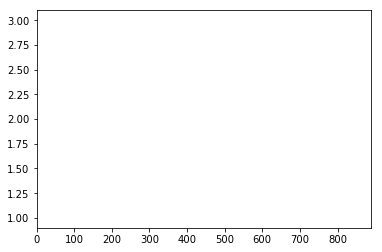

In [82]:
#start with a sub-set of data and verify that the least expensive fares were generally in Pclass 3
titanic_subset2=titanic_data.groupby(['PassengerId', 'Survived', 'Fare', 'Pclass'])
#print titanic_subset2['Survived'].first().head(n=30)

titanic_subset2['Pclass'].plot(kind='line')
#ax2 = titanic_subset2['Survived'].count().plot(kind='line', color='blue', position=1)
#ax.set_xlabel("price")
#ax.set_ylabel("Pclass")
#plt.show()

In [20]:
titanic_data.groupby(['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [21]:
#to look at question #2, i want to get a distribution by ticket price for both passengers at time of lauch and survived
titanic_data.groupby(['Pclass']).sum()


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,7111.42,90,77,18177.4125
2,82056,87,5168.83,74,70,3801.8417
3,215625,119,8924.92,302,193,6714.6951


In [22]:
x.sort_values()

NameError: name 'x' is not defined

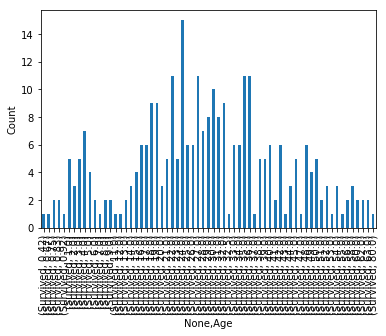

In [23]:
df_age_survived = titanic_data[(titanic_data.Survived)==1].copy()
df_age_survived.groupby(['Age'])[['Survived']].count().unstack().plot(kind='bar').set_ylabel('Count')
plt.show()

In [24]:
y=x.groups
#y.sort(['Survived', 'Sex'], ascending=[True, False])
z=sorted(y)

NameError: name 'x' is not defined

In [6]:
#not sure what i'm doing here.....eliminate
titanic_subset['Age'].mean().head(n=10)

PassengerId  Survived  Sex     Age 
1            0         male    22.0    22.0
2            1         female  38.0    38.0
3            1         female  26.0    26.0
4            1         female  35.0    35.0
5            0         male    35.0    35.0
7            0         male    54.0    54.0
8            0         male    2.0      2.0
9            1         female  27.0    27.0
10           1         female  14.0    14.0
11           1         female  4.0      4.0
Name: Age, dtype: float64

In [7]:
y=titanic_subset['Survived']
print y
#eliminate

In [9]:
#now I want to know how many of each sex and from the following I learn that there were 577 males at time of voyage
titanic_data[['Sex']].describe()

#eliminate

,Sex
count,891
unique,2
top,male
freq,577


In [16]:
#In general, in response to Q#1 womean and children had higher survivability ratios
pd.DataFrame(df_sex_survived['Age'].describe())

,Age
count,290.000000
mean,28.343690
std,14.950952
min,0.420000
25%,19.000000
50%,28.000000
75%,36.000000
max,80.000000


In [12]:
#And here is a description of the histogram
pd.DataFrame(titanic_data['Age'].describe())

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


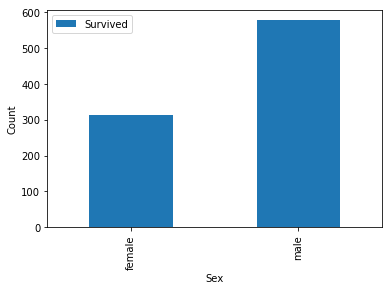

In [18]:
titanic_data.groupby(['Sex'])[['Survived']].count().plot(kind='bar').set_ylabel('Count')